<a href="https://colab.research.google.com/github/Ikjott/Loan-Given-Default/blob/main/Loan_Given_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                            **Loss Given Deafault**
#                                              **IME672 - Group 3**



Problem Description :

Loss given default (LGD) is the amount of money a bank or other financial institution loses when a borrower defaults on a loan. It is a very important parameter in risk models used by the banks to calculate their economic capital and expected losses.

In this project, we aim to predict the loss on an asset(lgd_time) to a bank. In the given dataset we have  multiple parameters which will be used in various models to project this loss.

The data set has been kindly provided by a European bank and has been slightly modified and anonymized. It includes 2,545 observations on loans and LGDs. Key variables are:

◾ LTV: Loan-to-value ratio, in %

◾ Recovery_rate: Recovery rate, in %

◾ lgd_time: Loss rate given default (LGD), in %

◾ y_logistic: Logistic transformation of the LGD

◾ lnrr: Natural logarithm of the recovery rate

◾ Y_probit: Probit transformation of the LGD

◾ purpose1: Indicator variable for the purpose of the loan; 1 = renting purpose, 0 = other

◾ event: Indicator variable for a default or cure event; 1 = event, 0 = no event



In [ ]:
#importing the libraries required
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


#Reading Data

In [ ]:
#reading data from csv fil
df =pd.read_csv("https://github.com/Ikjott/Loan-Given-Default/blob/bafa8e549dd4e032d4271a8d68d411484a10d37e/lgd.csv")

In [ ]:
#printing the first 10 rows
df.head(10)

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
0,0.214078,0.698016,0.301984,-0.837866,-0.359514,-0.518701,0,1
1,0.214078,0.780084,0.219916,-1.266157,-0.248354,-0.772477,0,1
2,0.214078,0.702287,0.297713,-0.858212,-0.353413,-0.530989,0,1
3,0.214078,0.753989,0.246011,-1.120001,-0.282378,-0.687096,0,1
4,0.214078,0.802813,0.197187,-1.403967,-0.219634,-0.851711,0,1
5,0.027384,0.992142,0.007858,-4.838383,-0.007889,-2.415462,0,1
6,0.062669,0.999990,0.000010,-11.512915,0.000000,-4.264891,0,0
7,0.226131,0.980666,0.019334,-3.926345,-0.019524,-2.067694,0,1
8,0.007380,0.992049,0.007951,-4.826530,-0.007982,-2.411177,0,1
9,0.062931,0.999990,0.000010,-11.512915,0.000000,-4.264891,0,0


#Dataset Features

In [ ]:
#Shape of the dataset
df.shape

(2545, 8)

The given dataset has 2545 rows(data points) and 8 columns ( attributes).

LTV is a continuous valued numeric attribute.

lgd_time is a numeric attribute with values between 0 and 1.

Recovery_rate is 1 - lgd_time.

y_logistic, Y_probit and lnrr are transformations of the lgd_time varible.

purpose1 is a binary variable which takes value 1 if the loan is for renting purposes and for other purposes 0.

event is also a binary variable which is 1 when the borrower defaults the loan and else 0

In [ ]:
#Dataset Summary
df.describe()

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
count,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000,2545.000000
mean,0.676556,0.771870,0.228130,-3.941343,-0.996647,-1.650813,0.072692,0.713949
std,0.364127,0.329109,0.329109,6.073280,2.699960,2.304122,0.259681,0.452002
min,0.001359,0.000010,0.000010,-11.512915,-11.512925,-4.264891,0.000000,0.000000
25%,0.399181,0.602146,0.000010,-11.512915,-0.507256,-4.264891,0.000000,0.000000
50%,0.659417,0.967934,0.032066,-3.407383,-0.032591,-1.851268,0.000000,1.000000
75%,0.923548,0.999990,0.397854,-0.414414,0.000000,-0.258905,0.000000,1.000000
max,1.984065,0.999990,0.999990,11.512915,0.000000,4.264891,1.000000,1.000000


In [ ]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTV            2545 non-null   float64
 1   Recovery_rate  2545 non-null   float64
 2   lgd_time       2545 non-null   float64
 3   y_logistic     2545 non-null   float64
 4   lnrr           2545 non-null   float64
 5   Y_probit       2545 non-null   float64
 6   purpose1       2545 non-null   int64  
 7   event          2545 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 159.2 KB


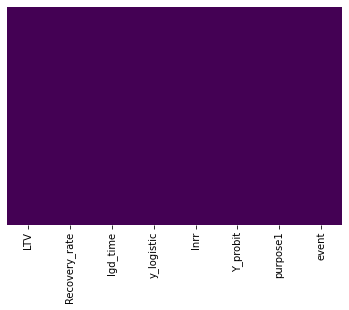

In [ ]:
# Heatmap for null/missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

There are no missing values in the dataset.

In [ ]:
#Checking for LTV and lgd_time

df[['LTV', 'lgd_time']].describe()

,LTV,lgd_time
count,2545.000000,2545.000000
mean,0.676556,0.228130
std,0.364127,0.329109
min,0.001359,0.000010
25%,0.399181,0.000010
50%,0.659417,0.032066
75%,0.923548,0.397854
max,1.984065,0.999990


# Data Visualization

Default:  71.395 % of the dataset
Non-default:  28.605 % of the dataset


Text(0.5, 0, 'Class ( 0:Normal , 1:Default)')

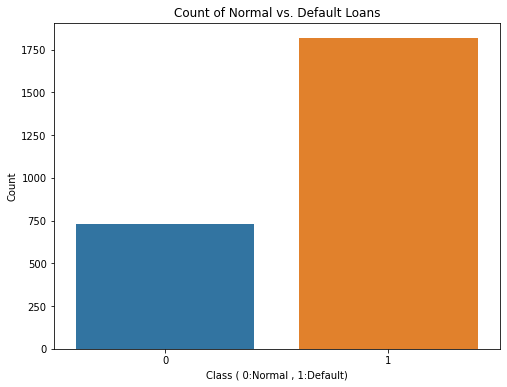

In [ ]:
# Default loans Distribution

print('Default: ', round(df['event'].value_counts()[1]/len(df) * 100,3), '% of the dataset')
print('Non-default: ', round(df['event'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
counts = df.event.value_counts()
Normal = counts[0]
Default = counts[1]
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Normal vs. Default Loans')
plt.ylabel('Count')
plt.xlabel('Class ( 0:Normal , 1:Default)')

 It is clear that for non default loans that the recovery_rate will be 1 hence lgd_time will be 0

In [ ]:
#Creating a dataset "default_loans" which contains the loan details where the amount was defaulted.
default_loans = df[df.event==1]
default_loans.describe()

,LTV,Recovery_rate,lgd_time,y_logistic,lnrr,Y_probit,purpose1,event
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.0
mean,0.746421,0.680471,0.319529,-0.907713,-1.395964,-0.603455,0.088608,1.0
std,0.369248,0.350019,0.350019,4.413745,3.107150,1.897446,0.284255,0.0
min,0.001359,0.000010,0.000018,-10.935153,-11.512925,-4.134063,0.000000,1.0
25%,0.468740,0.438010,0.023072,-3.745800,-0.825514,-1.994077,0.000000,1.0
50%,0.752470,0.854781,0.145219,-1.772602,-0.156910,-1.057161,0.000000,1.0
75%,0.979855,0.976928,0.561990,0.249243,-0.023342,0.156017,0.000000,1.0
max,1.984065,0.999982,0.999990,11.512915,-0.000018,4.264891,1.000000,1.0


There are 1817 loans out of 2545 which were defaulted in the given dataset.

Renting:  7.269 % of the dataset
Others:  92.731 % of the dataset


Text(0.5, 0, 'Class ( 0 : Non-rent , 1 : Rent)')

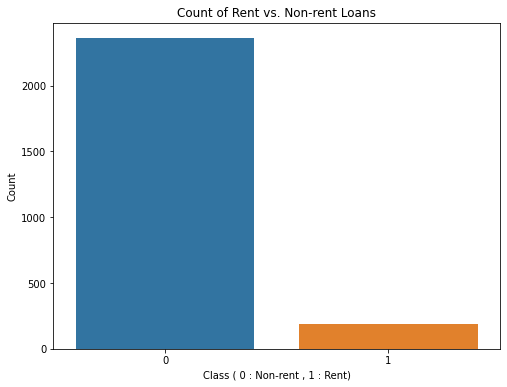

In [ ]:
#Distribution of Purpose in entire dataset 
print('Renting: ', round(df['purpose1'].value_counts()[1]/len(df) * 100,3), '% of the dataset')
print('Others: ', round(df['purpose1'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
counts = df.purpose1.value_counts()
Non_rent = counts[0]
Rent = counts[1]
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Rent vs. Non-rent Loans')
plt.ylabel('Count')
plt.xlabel('Class ( 0 : Non-rent , 1 : Rent)')

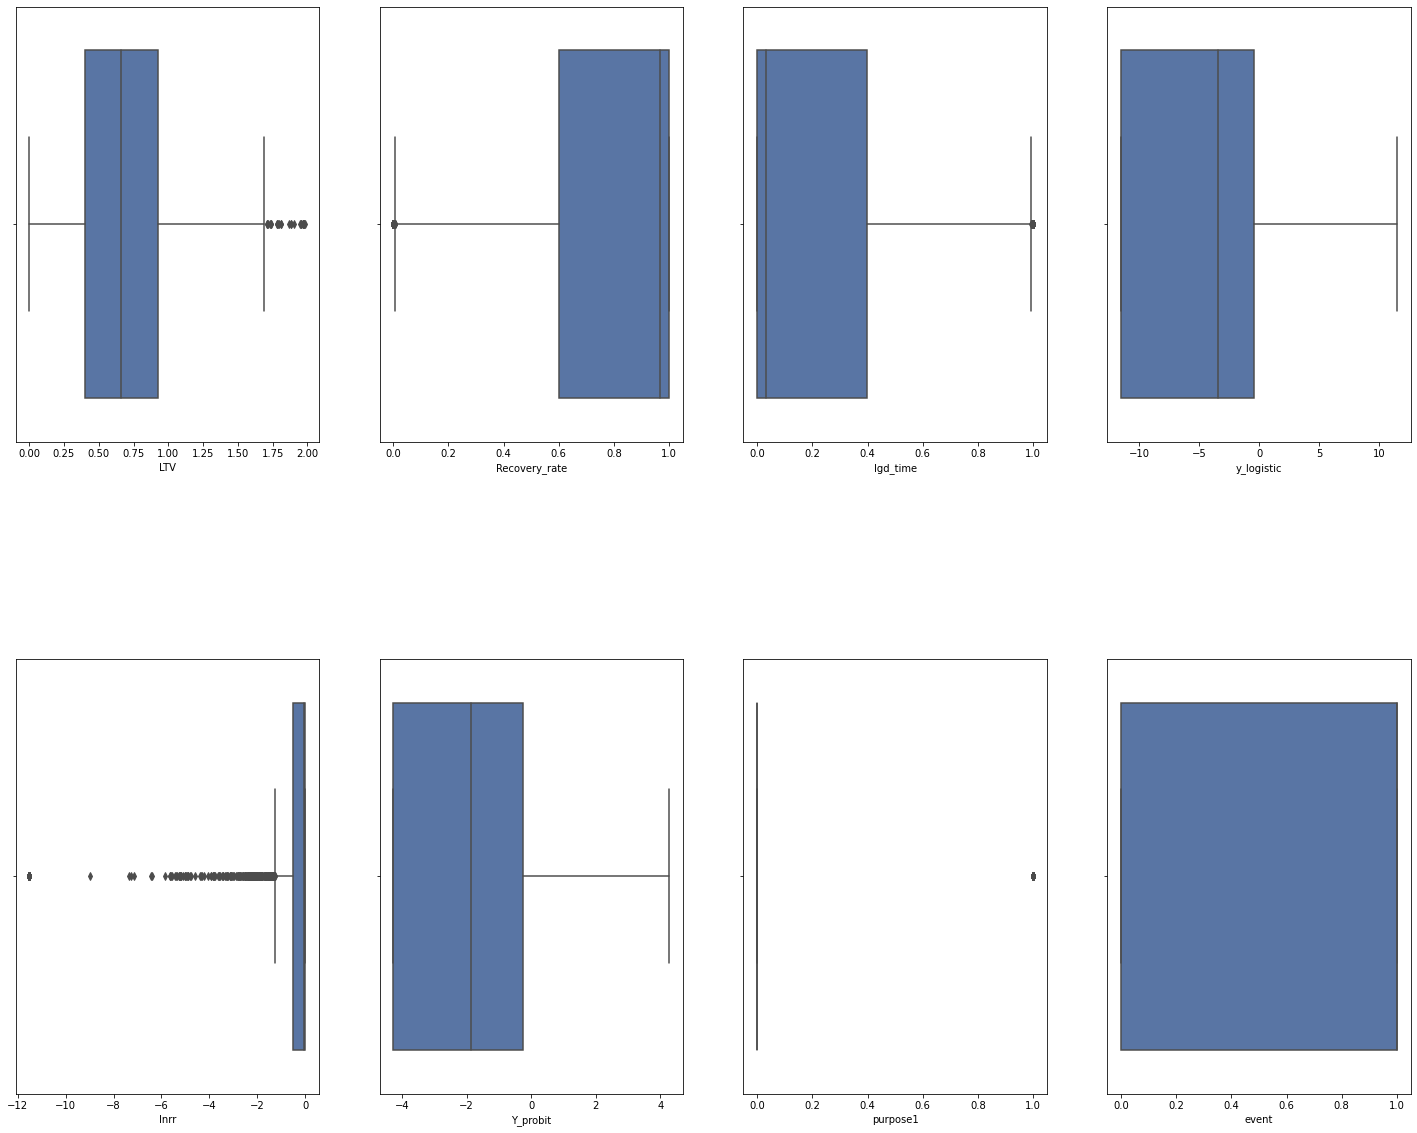

In [ ]:
#Distribution of lgd_time variable in entire dataset
%matplotlib inline


fig, axes = plt.subplots(2, 4, figsize=(25, 20),)
for i,ax in zip(df.columns,axes.flat):
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

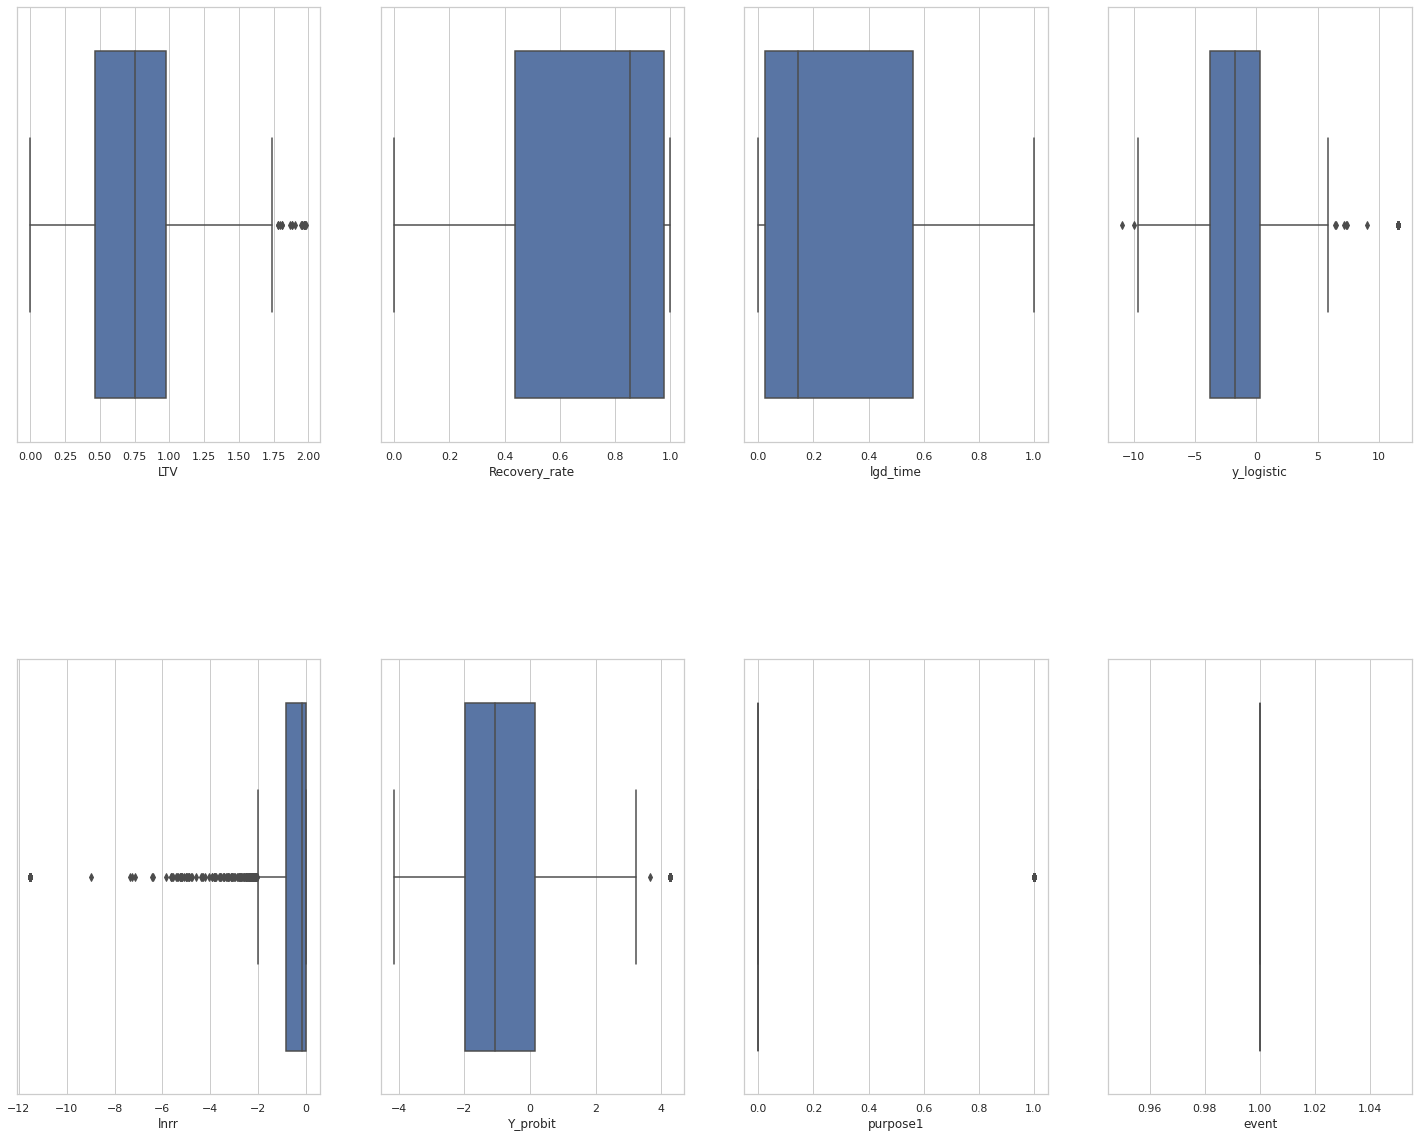

In [ ]:
#Distribution of lgd_time variable in the default_loans dataset
%matplotlib inline


fig, axes = plt.subplots(2, 4, figsize=(25, 20),)
for i,ax in zip(default_loans.columns,axes.flat):
    sns.set(style="whitegrid")
    sns.boxplot(data=default_loans, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

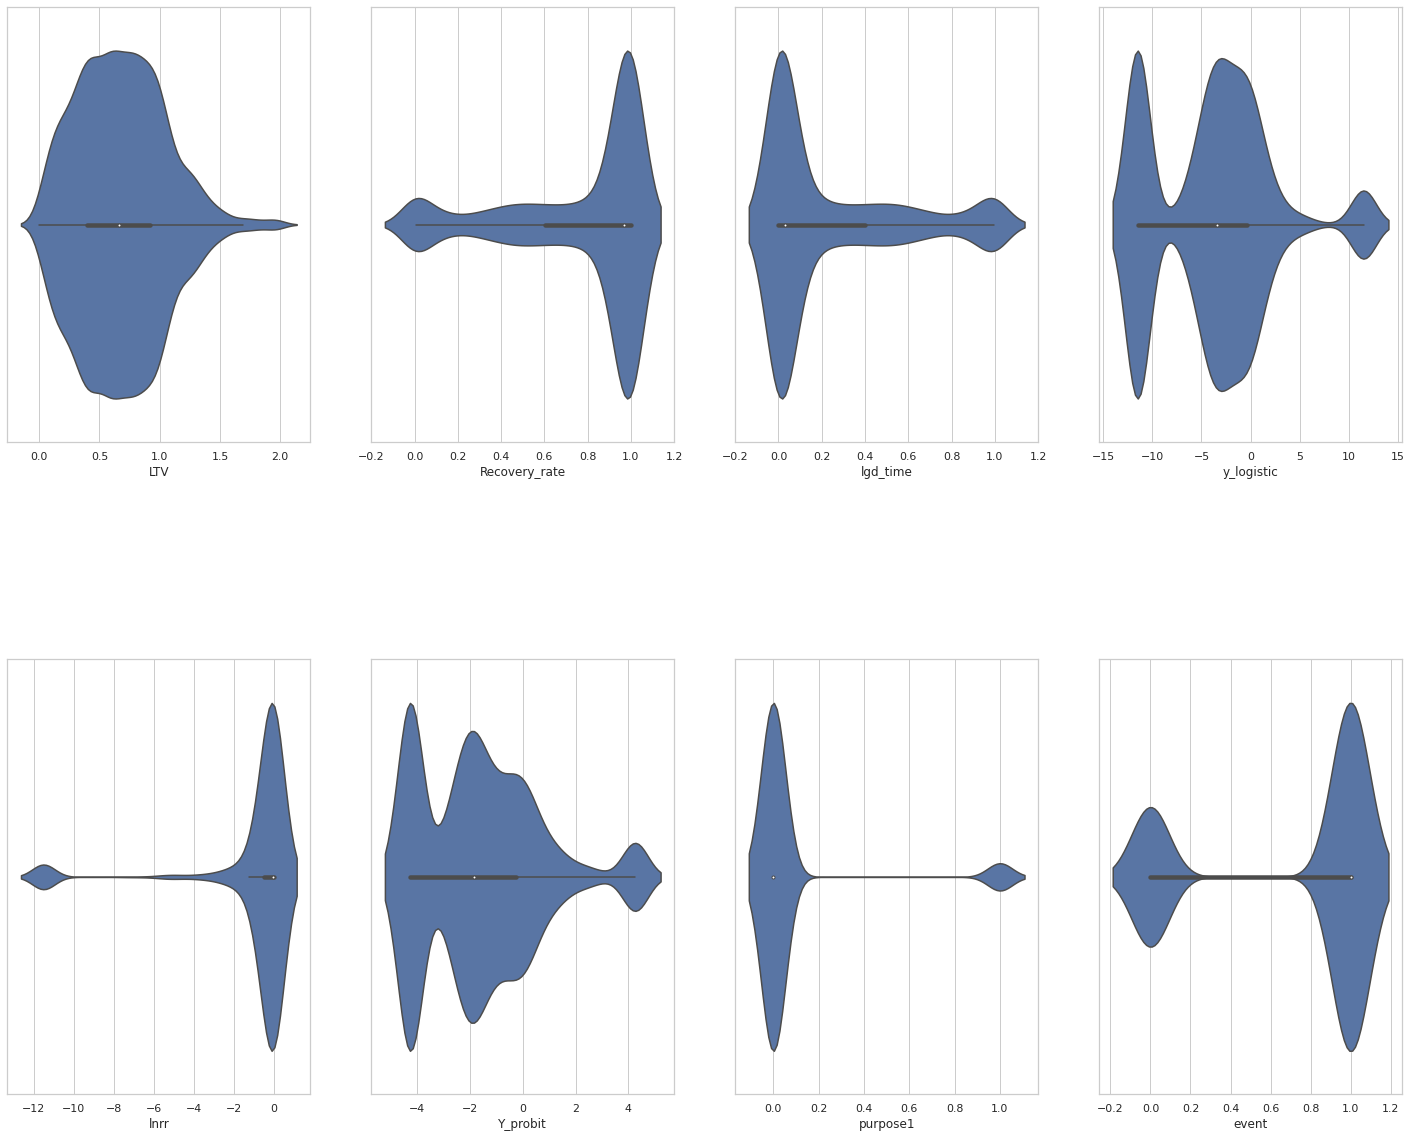

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 20),)
for i,ax in zip(df.columns,axes.flat):
    sns.set(style="whitegrid")
    sns.violinplot(data=df, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

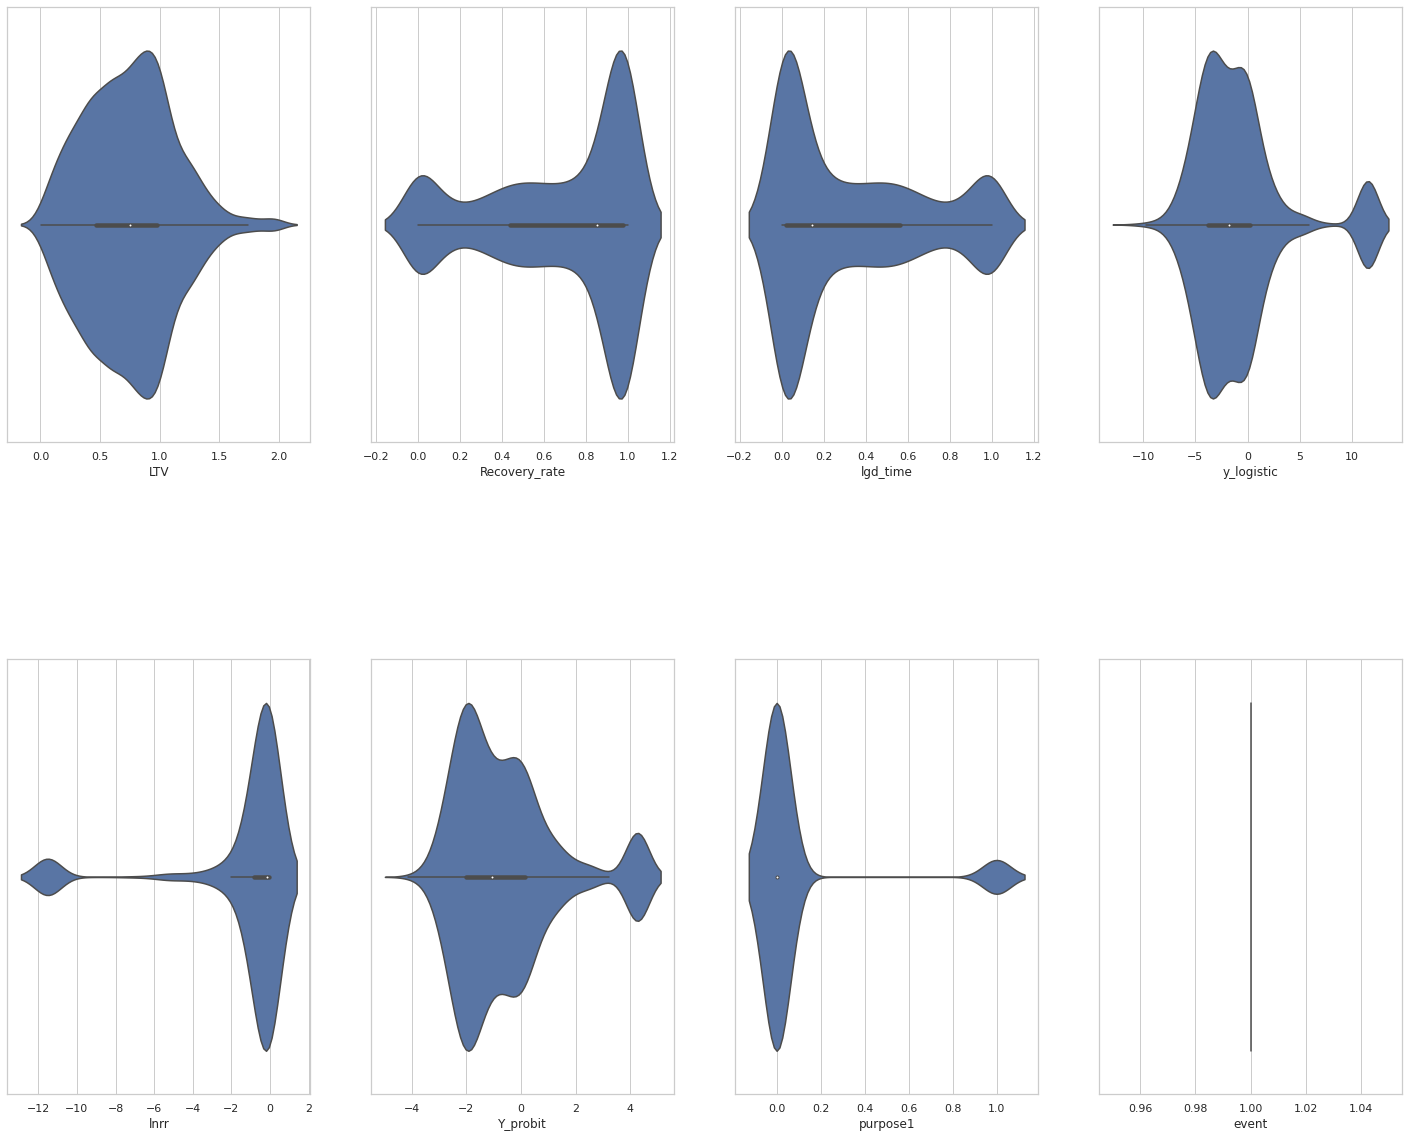

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 20),)
for i,ax in zip(default_loans.columns,axes.flat):
    sns.set(style="whitegrid")
    sns.violinplot(data=default_loans, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

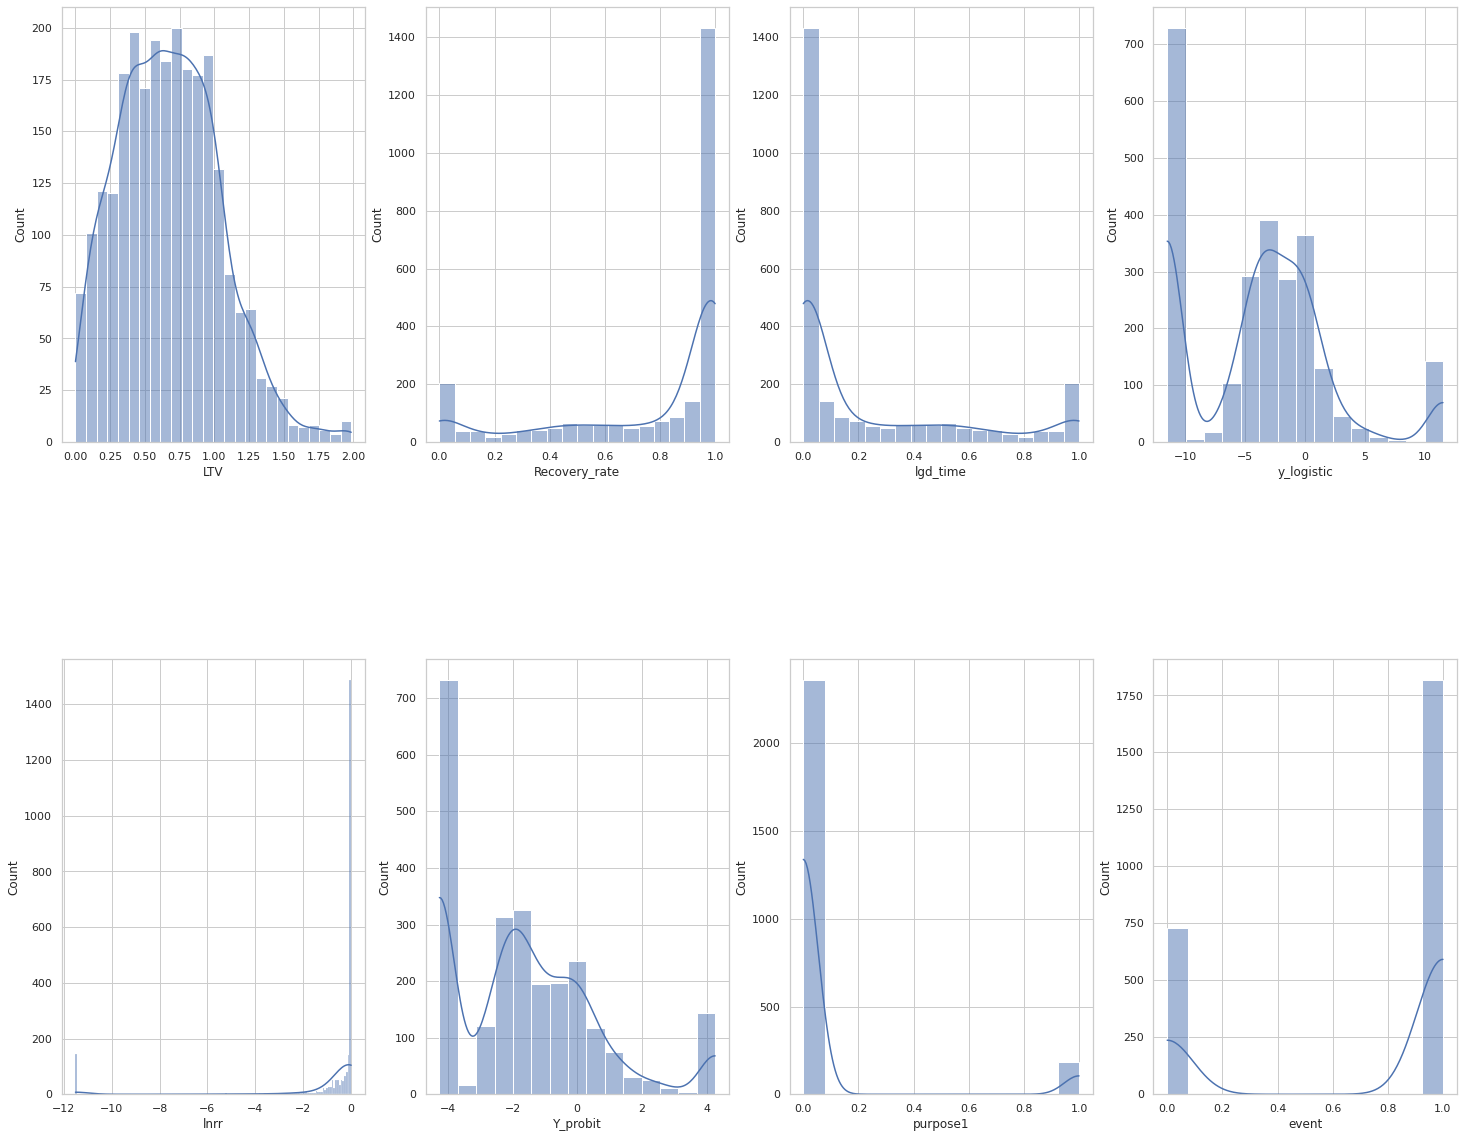

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


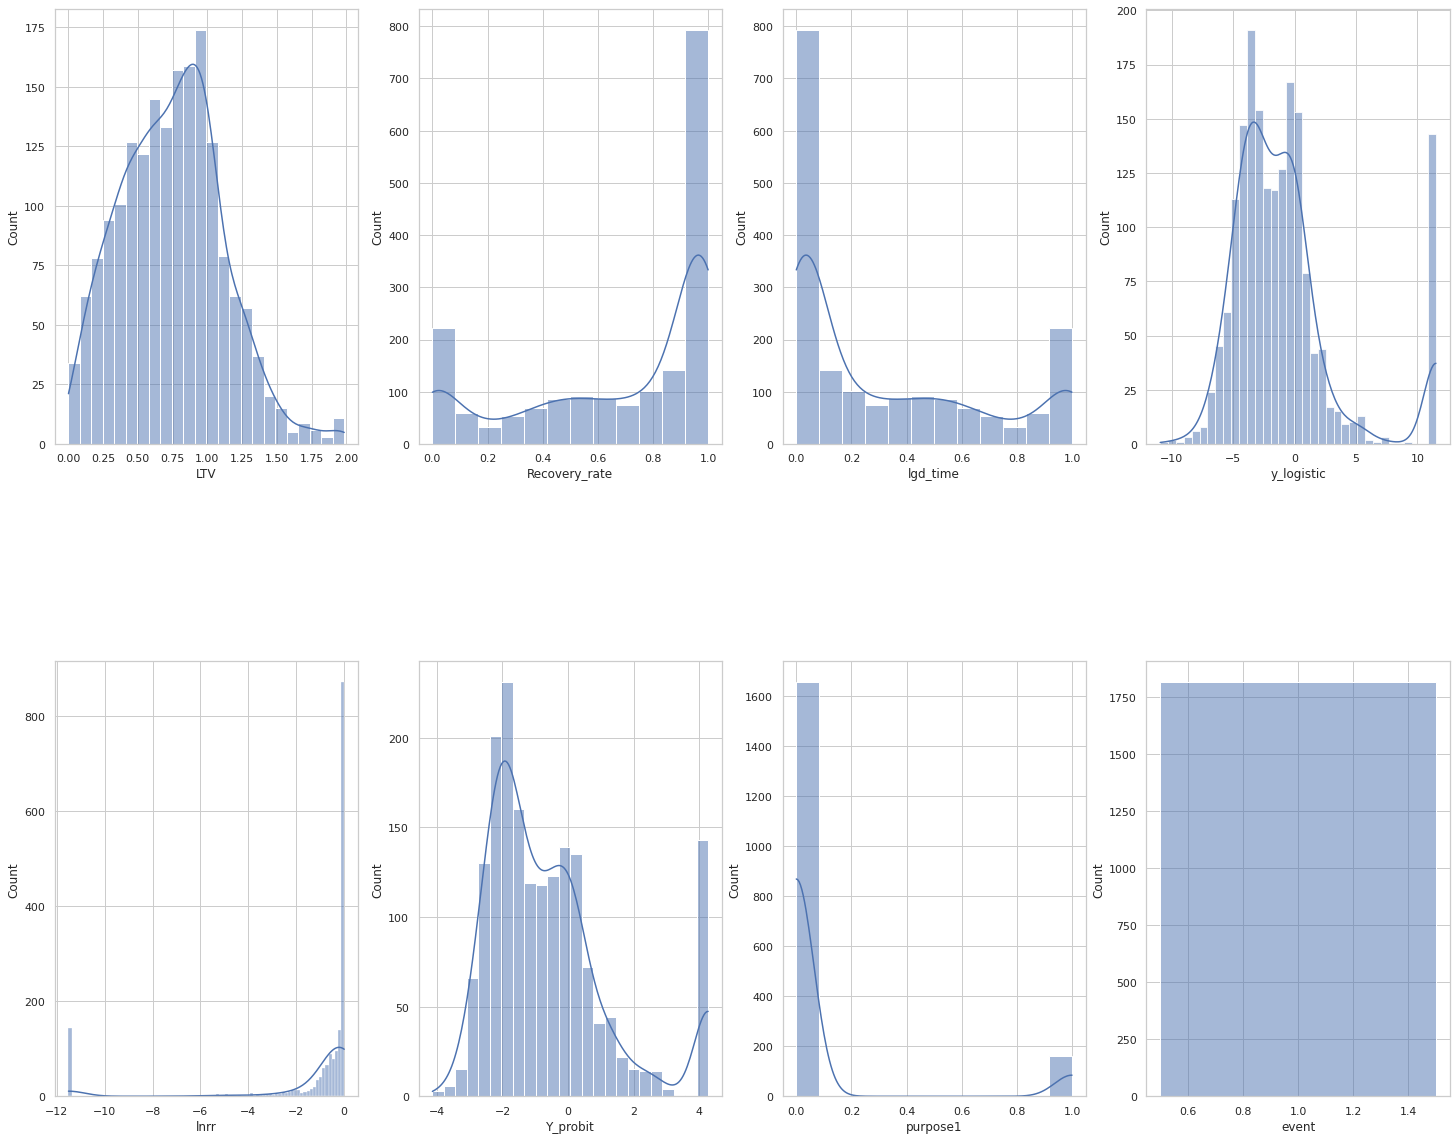

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 20))
for i,ax in zip(default_loans.columns,axes.flat):
    sns.histplot(data=default_loans,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<Figure size 432x288 with 0 Axes>

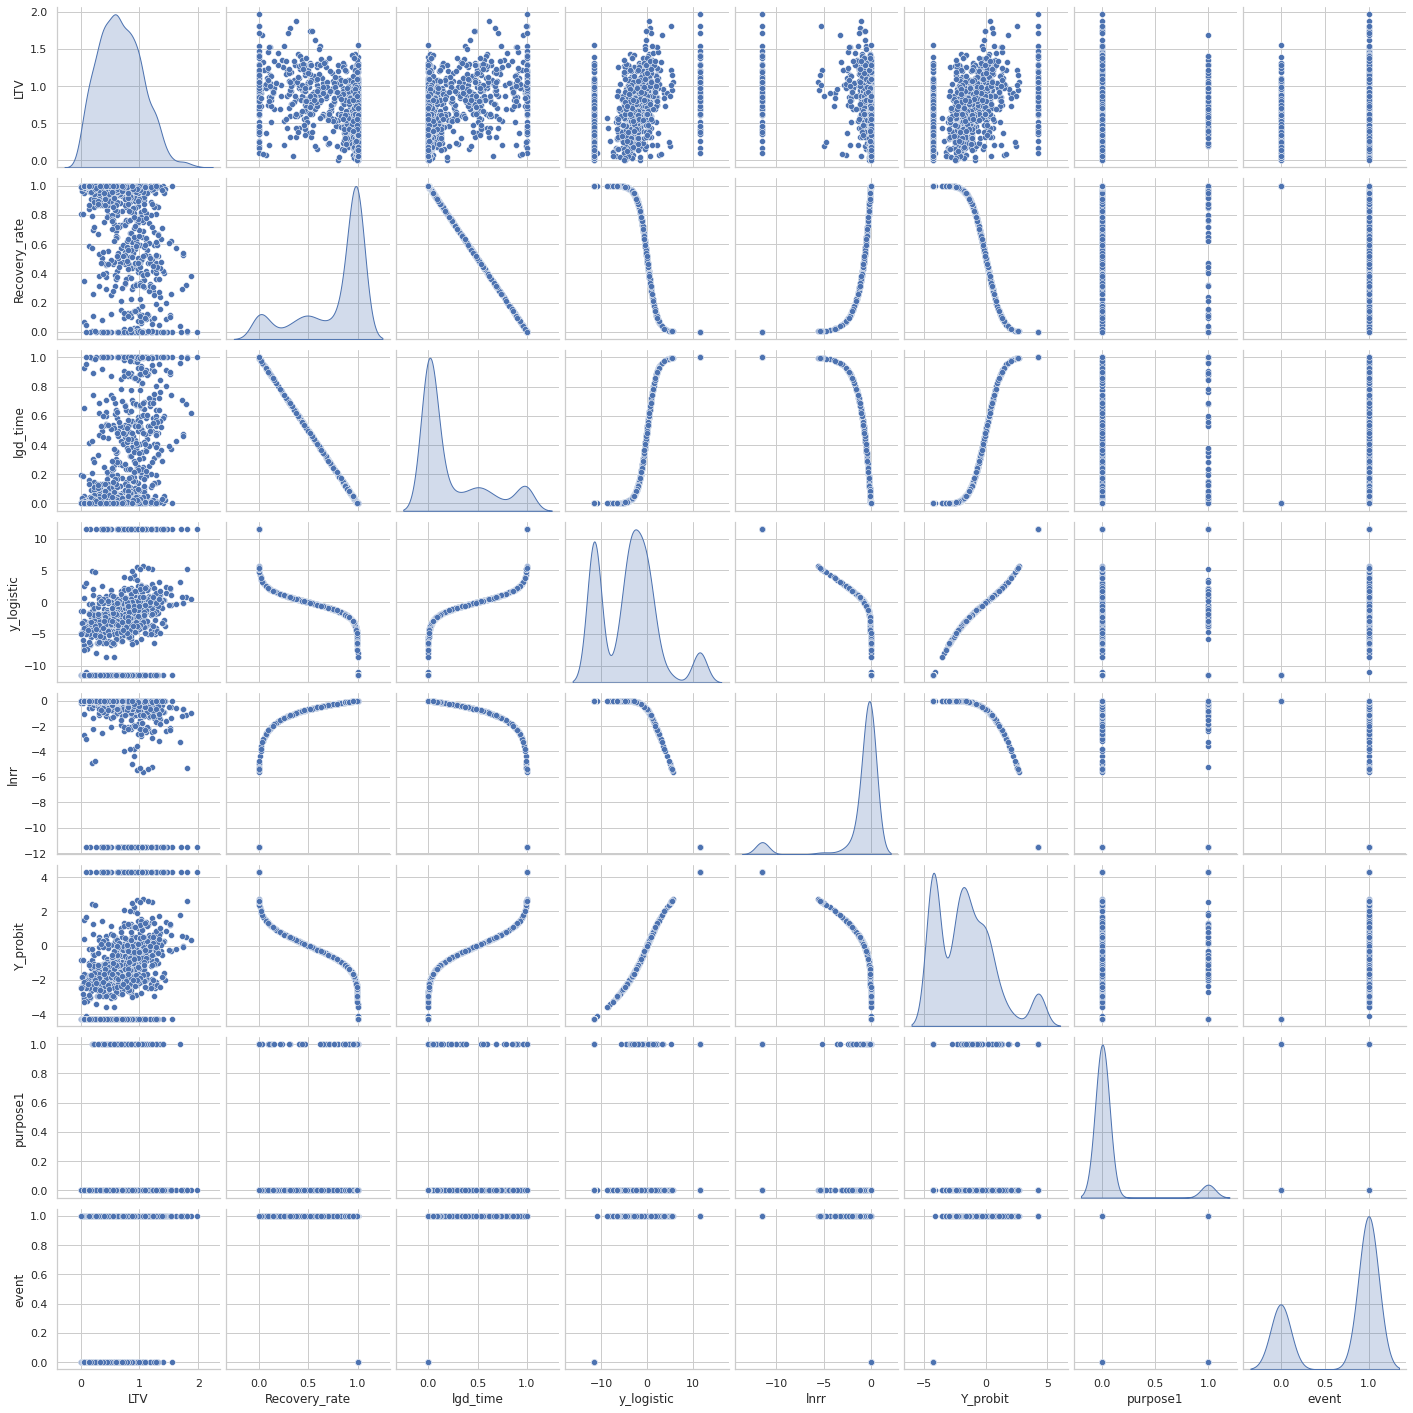

In [ ]:
# from IPython.display import Image

# sns_plot = sns.pairplot(df, height=2.0)
# sns_plot.savefig("pairplot.png")

# plt.clf()
# Image(filename='pairplot.png')  


plt.figure()
# plt.pair
sns.pairplot(df.sample(1000),diag_kind='kde')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

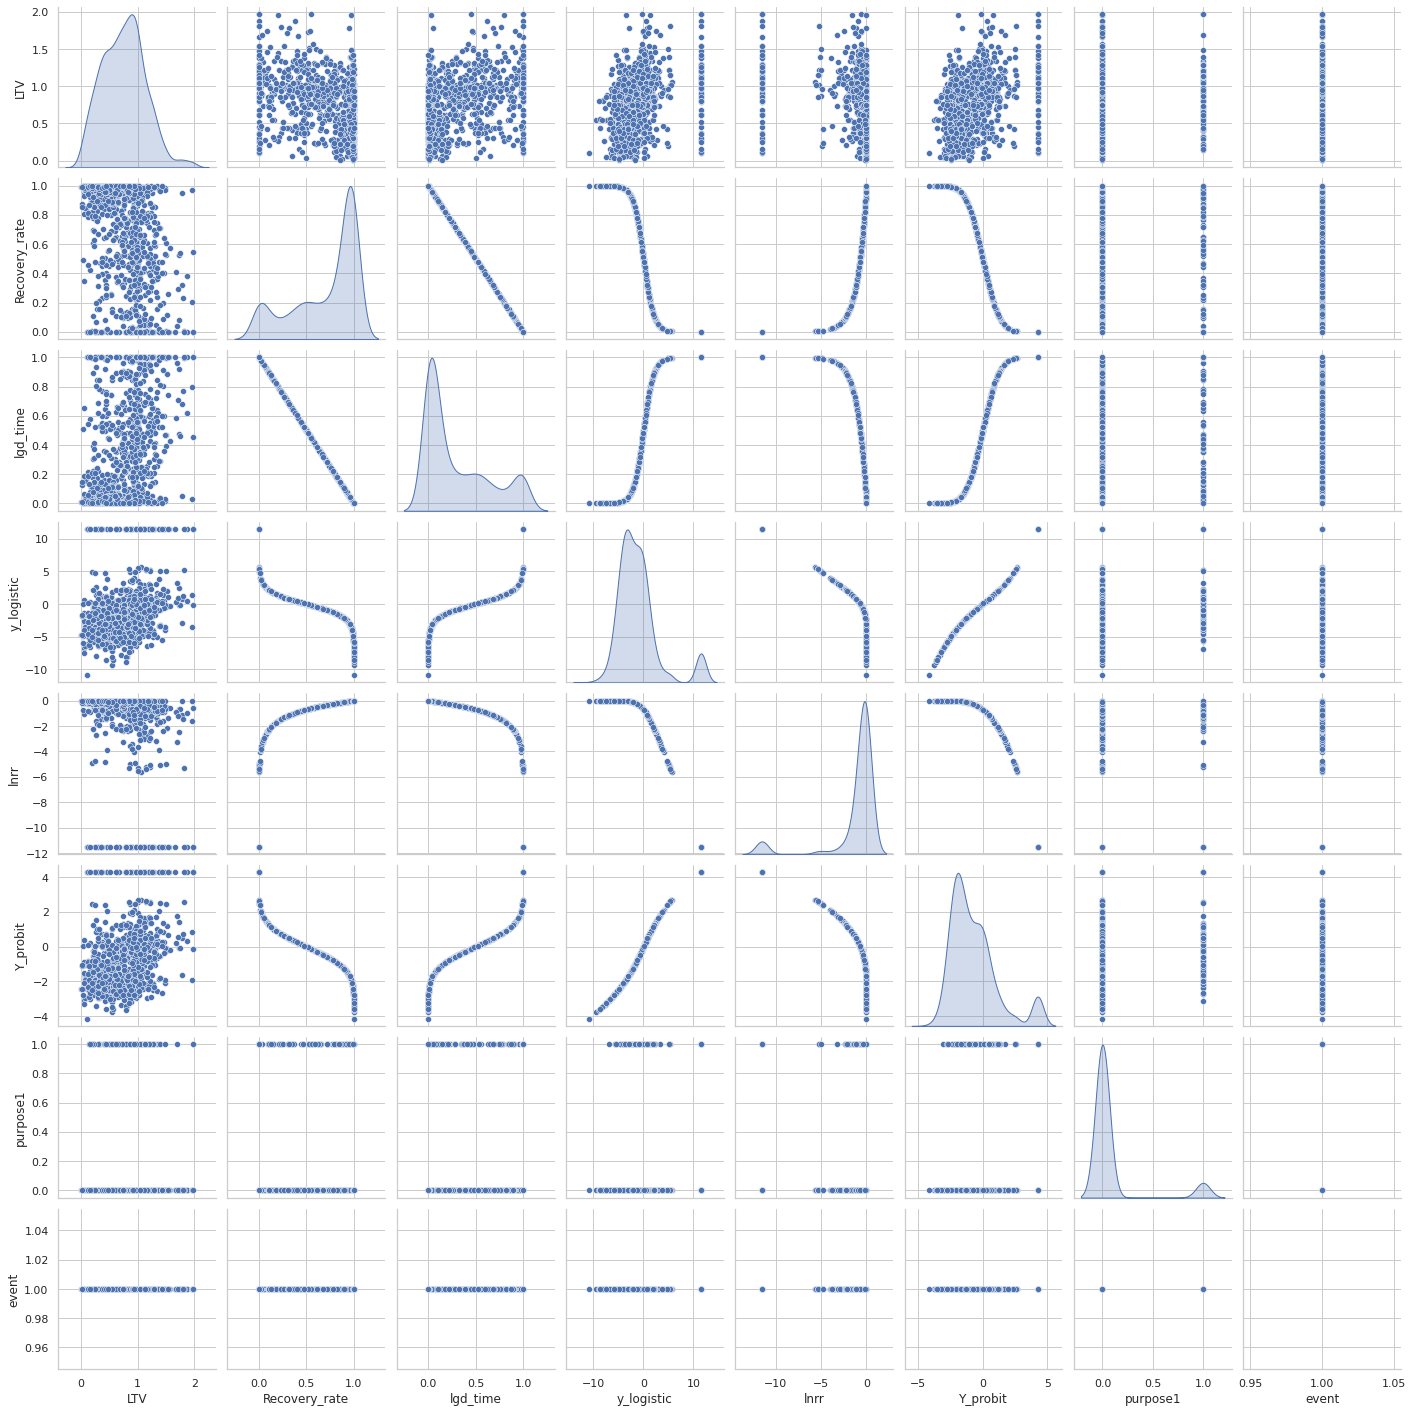

In [ ]:

plt.figure()
# plt.pair
sns.pairplot(default_loans.sample(1000),diag_kind='kde')
plt.show() 

Text(0.5, 1.0, 'Amount of normal and rent loans with the distrbution of LTV and lgd_time')

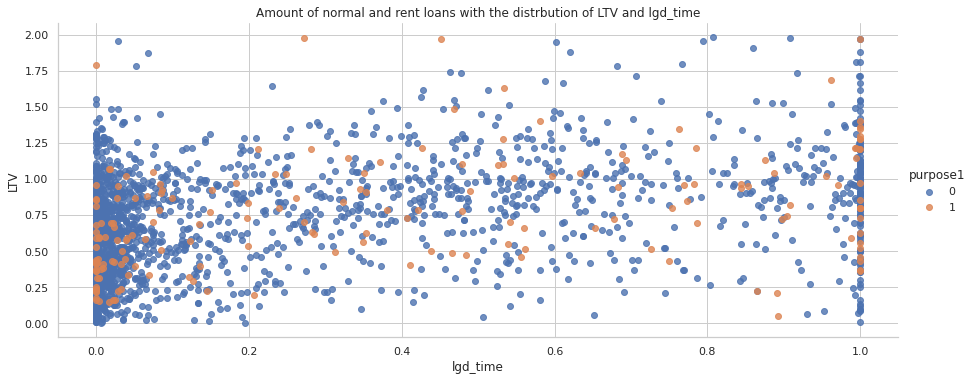

In [ ]:
# Distribution of Loan to value ratio(LTV) vs the lgd_time
ax = sns.lmplot(y="LTV", x="lgd_time", fit_reg=False, aspect=2.5, data=df, hue='purpose1')
plt.title("Amount of normal and rent loans with the distrbution of LTV and lgd_time",fontsize=12)

##Correlation Heat Map

In [ ]:
#Correlation Matrix
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)


                 LTV  Recovery_rate  lgd_time  ...  Y_probit  purpose1  event
LTV            1.000         -0.424     0.424  ...     0.427     0.058  0.303
Recovery_rate -0.424          1.000    -1.000  ...    -0.908    -0.138 -0.439
lgd_time       0.424         -1.000     1.000  ...     0.908     0.138  0.439
y_logistic     0.410         -0.842     0.842  ...     0.990     0.140  0.789
lnrr          -0.252          0.761    -0.761  ...    -0.764    -0.099 -0.234
Y_probit       0.427         -0.908     0.908  ...     1.000     0.144  0.718
purpose1       0.058         -0.138     0.138  ...     0.144     1.000  0.097
event          0.303         -0.439     0.439  ...     0.718     0.097  1.000

[8 rows x 8 columns]


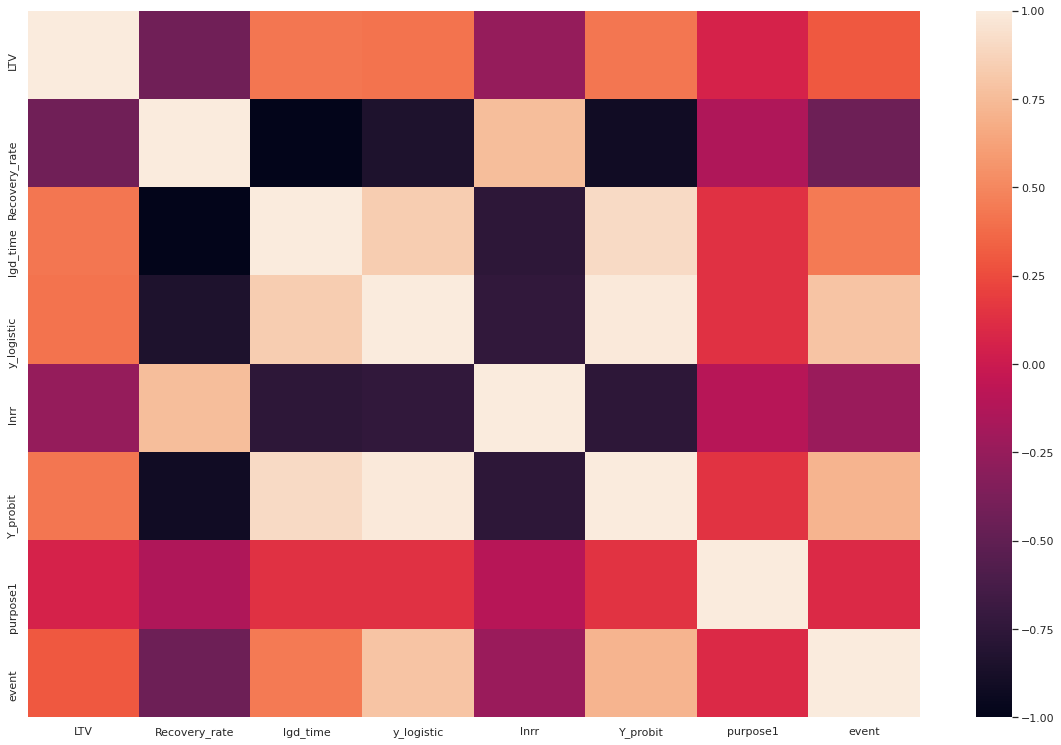

In [ ]:
#Correlation heat map
plt.subplots(figsize=(20,13 ))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)

The variables lgd_time, y_logistic and Y_probit are highly correlated

 Attributes recovery_rate and lnrr are also positively correlated

As expected recovery_rate and lgd_time are negatively correlated as lgd_time = 1 - recovery_rate

In [ ]:
!pip install ppscore
import ppscore as pps
pps.matrix(df)



     |████████████████████████████████| 47 kB 1.9 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13067 sha256=59d240d4b05b83227abae661755dc58a9125e07a9c4f550228d9027a3482e3a2
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,LTV,LTV,1.000,predict_itself,True,None,0.000,1.000,None
1,LTV,Recovery_rate,0.000,regression,True,mean absolute error,0.223,0.236,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
2,LTV,lgd_time,0.000,regression,True,mean absolute error,0.223,0.236,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
3,LTV,y_logistic,0.000,regression,True,mean absolute error,4.681,4.930,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
4,LTV,lnrr,0.000,regression,True,mean absolute error,0.991,1.479,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
...,...,...,...,...,...,...,...,...,...
59,event,y_logistic,0.528,regression,True,mean absolute error,4.681,2.209,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
60,event,lnrr,0.000,regression,True,mean absolute error,0.991,1.345,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
61,event,Y_probit,0.423,regression,True,mean absolute error,1.800,1.039,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."
62,event,purpose1,0.000,regression,True,mean absolute error,0.073,0.134,"DecisionTreeRegressor(ccp_alpha=0.0, criterion..."


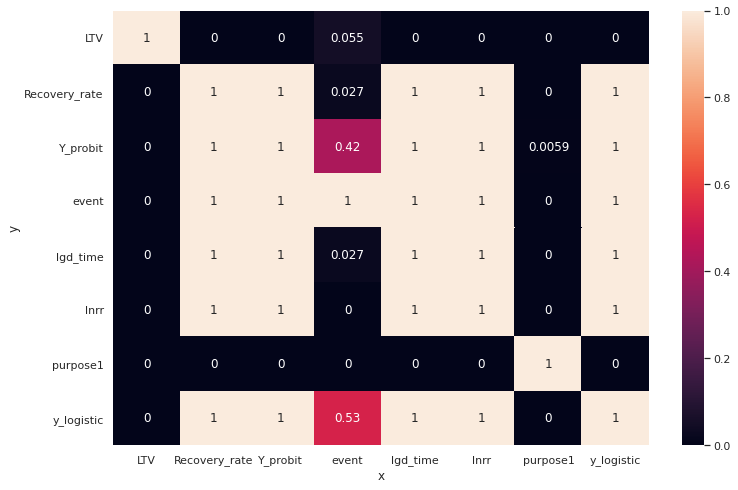

In [ ]:
from matplotlib.pyplot import figure


figure(figsize=(12,8))

a = pps.matrix(df).pivot(columns='x', index='y', values='ppscore')

sns.heatmap(a, annot=True)

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
dftest=remove_outlier_IQR(df)

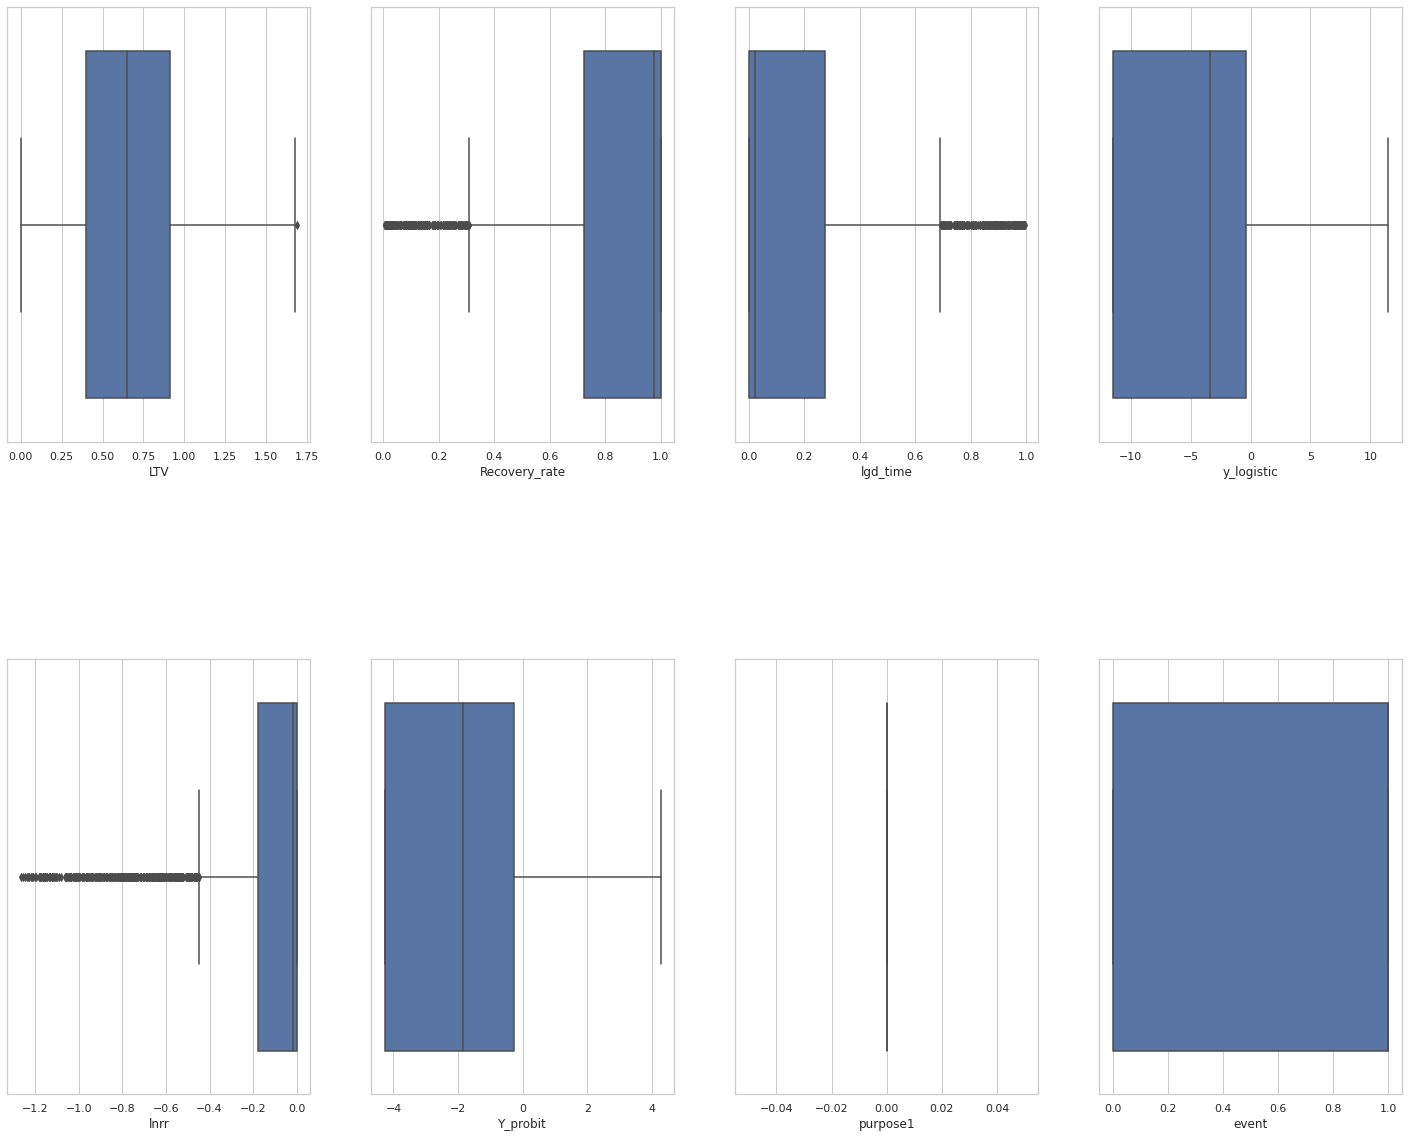

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 20),)
for i,ax in zip(dftest.columns,axes.flat):
    sns.boxplot(data=dftest, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# **Model Selection** 

**Linear Regression using statsmodels OLS**

In [ ]:
X = df[['LTV','purpose1']]
y = df['lgd_time'].values
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("MSE : ", results.mse_total)
print(results.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MSE :  0.10831262306424541
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     304.2
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          3.67e-119
Time:                        03:58:22   Log-Likelihood:                -509.24
No. Observations:                2545   AIC:                             1024.
Df Residuals:                    2542   BIC:                             1042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0379    

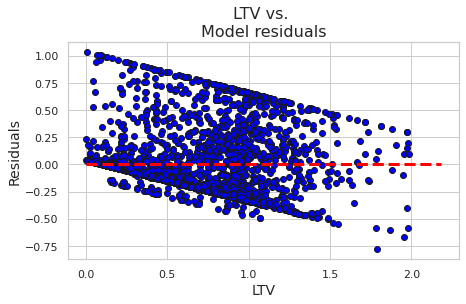

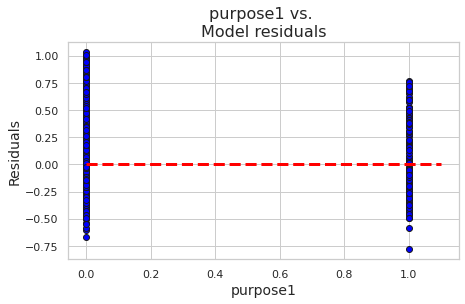

In [ ]:
for c in X.columns[1:]:
    plt.figure(figsize=(7,4))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X[c],y=results.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X[c])
    xmax = max(X[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

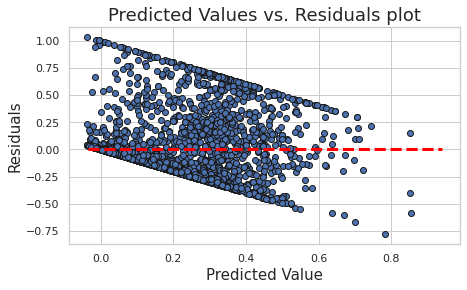

In [ ]:
plt.figure(figsize=(7,4))
p=plt.scatter(x=results.fittedvalues,y=results.resid,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Predicted Values vs. Residuals plot",fontsize=18)
plt.grid(True)
plt.show()

<Figure size 504x288 with 0 Axes>

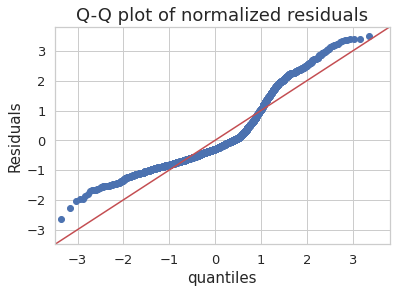

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(7,4))
fig=qqplot(results.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("quantiles",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

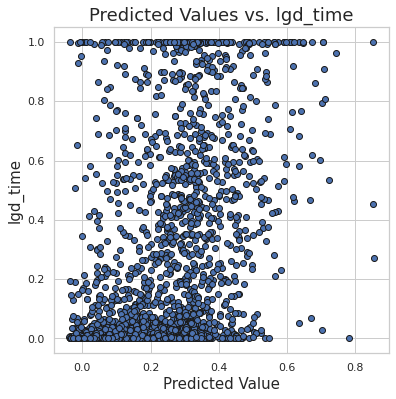

In [ ]:
plt.figure(figsize=(6,6))
p=plt.scatter(x=results.fittedvalues,y=y,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("lgd_time",fontsize=15)
plt.title("Predicted Values vs. lgd_time",fontsize=18)
plt.grid(True)
plt.show()

**Logistic Transformed Linear Regression**

In [ ]:
X = df[['LTV','purpose1']]
y = df['y_logistic'].values
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("MSE : ", results.mse_total)
print(results.summary())


MSE :  36.88472853857739
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     282.0
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          2.49e-111
Time:                        03:58:24   Log-Likelihood:                -7946.6
No. Observations:                2545   AIC:                         1.590e+04
Df Residuals:                    2542   BIC:                         1.592e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6899      

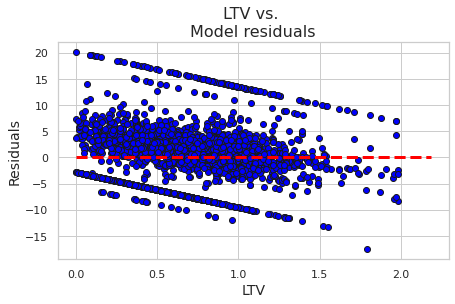

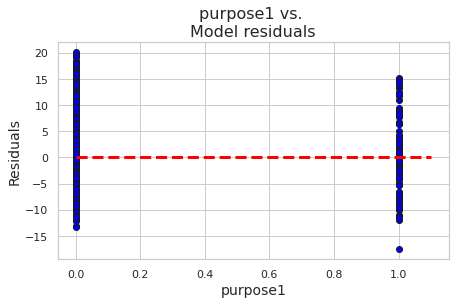

In [ ]:
for c in X.columns[1:]:
    plt.figure(figsize=(7,4))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X[c],y=results.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X[c])
    xmax = max(X[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

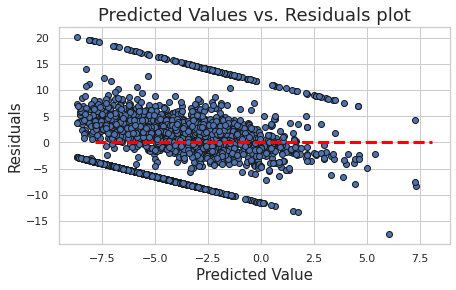

In [ ]:
plt.figure(figsize=(7,4))
p=plt.scatter(x=results.fittedvalues,y=results.resid,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Predicted Values vs. Residuals plot",fontsize=18)
plt.grid(True)
plt.show()

<Figure size 504x288 with 0 Axes>

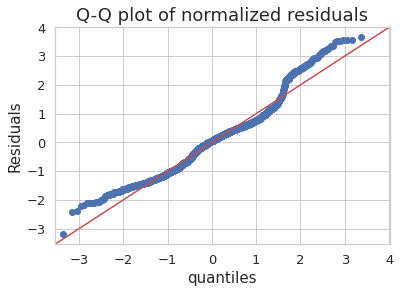

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(7,4))
fig=qqplot(results.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("quantiles",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

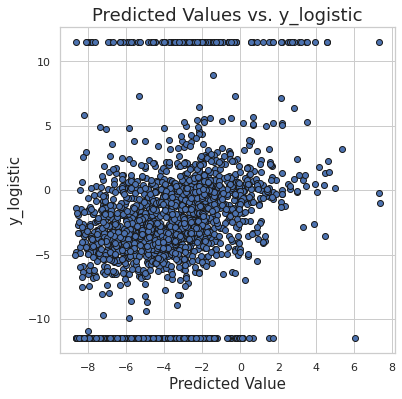

In [ ]:
plt.figure(figsize=(6,6))
p=plt.scatter(x=results.fittedvalues,y=y,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("y_logistic",fontsize=15)
plt.title("Predicted Values vs. y_logistic",fontsize=18)
plt.grid(True)
plt.show()

**Probit Transformed Linear Regression**

In [ ]:
X = df[['LTV','purpose1']]
y = df['Y_probit'].values
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("MSE : ", results.mse_total)
print(results.summary())

MSE :  5.308976843921164
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     311.6
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          9.51e-122
Time:                        03:58:26   Log-Likelihood:                -5456.0
No. Observations:                2545   AIC:                         1.092e+04
Df Residuals:                    2542   BIC:                         1.094e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5278      

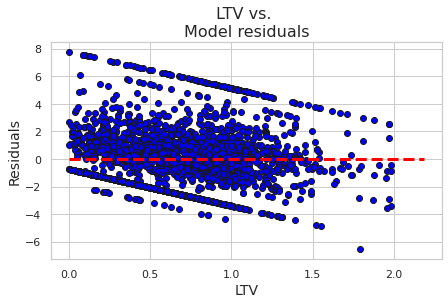

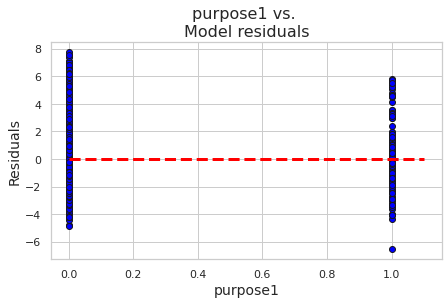

In [ ]:
for c in X.columns[1:]:
    plt.figure(figsize=(7,4))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X[c],y=results.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X[c])
    xmax = max(X[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

<Figure size 504x288 with 0 Axes>

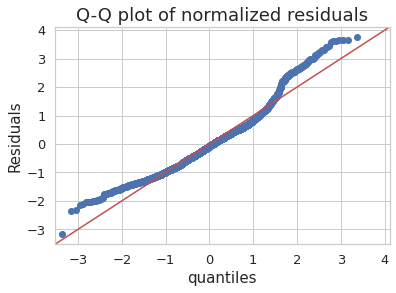

In [ ]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(7,4))
fig=qqplot(results.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("quantiles",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

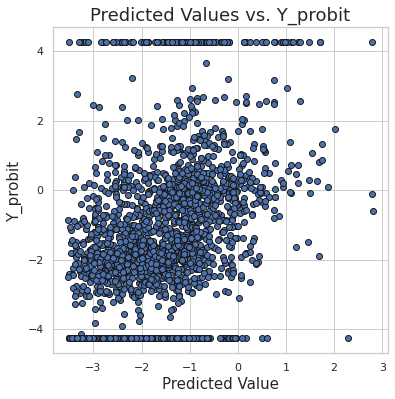

In [ ]:
plt.figure(figsize=(6,6))
p=plt.scatter(x=results.fittedvalues,y=y,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("Y_probit",fontsize=15)
plt.title("Predicted Values vs. Y_probit",fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
X = df[['LTV','purpose1']]
y = df['y_logistic'].values
# y_logistic , lgd_time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Random Forest Regression**

MSE : 46.47973961043424 



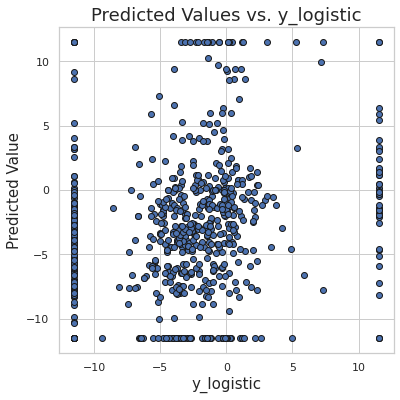

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 2 , random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print("MSE :",mean_squared_error(y_test, y_pred),"\n")

plt.figure(figsize=(6,6))
p=plt.scatter(x=y_test,y=y_pred,edgecolor='k')
xmin=min(y_test)
xmax = max(y_test)
plt.ylabel("Predicted Value",fontsize=15)
plt.xlabel("y_logistic",fontsize=15)
plt.title("Predicted Values vs. y_logistic",fontsize=18)
plt.grid(True)
plt.show()

**Decision Tree Regression**

MSE : 52.2255690070604 



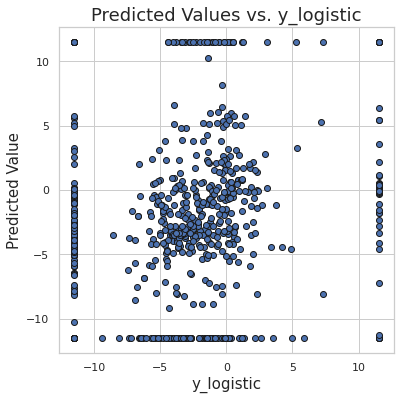

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
print("MSE :",mean_squared_error(y_test, y_pred),"\n")

plt.figure(figsize=(6,6))
p=plt.scatter(x=y_test,y=y_pred,edgecolor='k')
xmin=min(y_test)
xmax = max(y_test)
plt.ylabel("Predicted Value",fontsize=15)
plt.xlabel("y_logistic",fontsize=15)
plt.title("Predicted Values vs. y_logistic",fontsize=18)
plt.grid(True)
plt.show()

**Support Vector Regression**

MSE : 30.39025917765298 



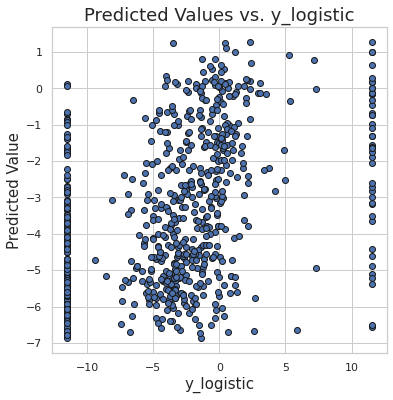

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') 
regressor.fit(X_train ,  y_train)
y_pred = (regressor.predict((X_test)))

print("MSE :",mean_squared_error(y_test, y_pred),"\n")

plt.figure(figsize=(6,6))
p=plt.scatter(x=y_test,y=y_pred,edgecolor='k')
xmin=min(y_test)
xmax = max(y_test)
plt.ylabel("Predicted Value",fontsize=15)
plt.xlabel("y_logistic",fontsize=15)
plt.title("Predicted Values vs. y_logistic",fontsize=18)
plt.grid(True)
plt.show()

# TO-BIT REGRESSION


The tobit model, also called a censored regression model, is designed to estimate linear relationships between variables when there is either left- or right-censoring in the dependent variable

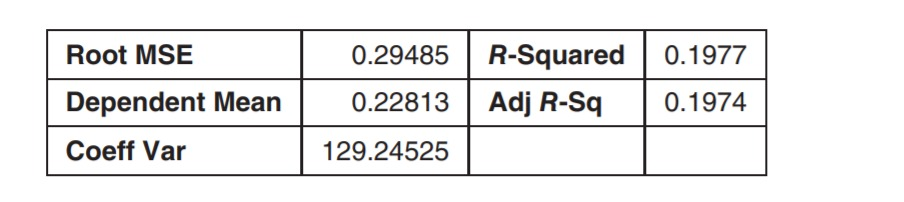

**Results and Interpretation**


*   The simple Linear Regression using statsmodels OLS gives a mse of 0.10 and a low R2 value of 0.19. The correlation between the dependent variable and the independent features is weak.
*   Logistic and Probit  Transformed Regressions give a pretty solid relation with a similar R2 value but they seem to fit the residuals well.
*   Other regressions like Decision Tree, Support Vector and Random Forest give a similar mean squared error and also do not seem to capture the relation between the features.
*   The best model which fits the data is the Probit Transformed Regression as it captures the residuals properly and also provides a better relation between the variables.



 




